## Basic implementation of Neural Network using numpy


In [113]:
# Use the following command to install required packages

# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class Layer:
    __slots__ = ['weights', 'biases', 'activation', 'biases_gradient', 'weights_gradient', "activation_derivative"]

    def __init__(self, nodes_in, nodes_out, activation='sigmoid'):
        self.weights = np.random.normal(size=(nodes_in, nodes_out),scale=1)
        self.biases = np.random.normal(size=(1, nodes_out))
        self.biases_gradient = np.zeros(self.biases.shape)
        self.weights_gradient = np.zeros(self.weights.shape)
        if activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        elif activation == 'linear':
            self.activation = self.linear
            self.activation_derivative = self.linear_derivative

    def calculate_layer(self, input):
        """
        Calculate the output of the layer
        Takes in a numpy array and returns a numpy array
        """
        return self.activation(np.dot(input, self.weights) + self.biases)

    def sigmoid(self, x):
        """
        Sigmoid activation function
        Takes in a numpy array and returns a numpy array
        """
        return 1/(1+np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        Sigmoid derivative function
        Takes in a numpy array and returns a numpy array
        """
        return x * (1 - x)

    def linear(self, x):
        """
        Linear activation function
        Takes in a numpy array and returns a numpy array
        """
        return x

    def linear_derivative(self, x):
        """
        Linear derivative function
        Takes in a numpy array and returns a numpy array
        """
        return np.ones_like(x)

    def report_layer(self, layer_num):
        return f'Layer number {layer_num}\nWeights\n{self.weights}\nbiases\n{self.biases}'

    def apply_gradient(self, learning_rate):
        self.weights -= learning_rate * self.weights_gradient
        self.biases -= learning_rate * self.biases_gradient

In [6]:
class NeuralNetwork:
    __slots__ = ['hidden_layers', 'layers']

    def __init__(self, hidden_layers, input_size, output_size):
        self.hidden_layers = hidden_layers
        self.layers = []

        # Create the input layer
        input_layer = Layer(1, hidden_layers[0])
        self.layers.append(input_layer)

        # Create the hidden layers
        for input_size, output_size in zip(hidden_layers, hidden_layers[1:]):
            self.layers.append(Layer(input_size, output_size))

        # Create the output layer
        output_layer = Layer(hidden_layers[-1], 1, activation='linear')
        self.layers.append(output_layer)

    def forward(self, input):
        """
        Takes a input and returns the output of the network
        """
        for layer in self.layers:
            input = layer.calculate_layer(input)
        return input

    def train(self, input, output, learning_rate=0.003, batch_size_frac=0.1, epochs=30000):
        """
        Train the network on a given dataset
        """
        best_mse = 100000000
        for epoch in range(epochs):
            merged = input.to_frame().join(output)
            merged = merged.sample(frac=batch_size_frac)
            self.calculate_gradient(merged["x"], merged["y"])
            self.apply_gradient(learning_rate)
            mse = self.mean_squared_error(merged["x"], merged["y"])
            if mse < best_mse:
                best_mse = mse
                params = [layer.weights.copy() for layer in self.layers]
            if epoch % 2000 == 0:
                print(f"Epoch {epoch} MSE: {best_mse}")
        for i, layer in enumerate(self.layers):
            print(f"Layer {i} weights: {layer.weights}")
            print(f"Layer {i} biases: {layer.biases}")

    def backpropagation(self, input, output):
        """
        Perform backpropagation on the network
        """
        pass

    def mean_squared_error(self, input, output):
        """
        Calculate the mean squared error of the network on a given dataset and output
        """
        mse = []
        for i,j in zip(input, output):
            mse.append((j - self.forward(i)) ** 2)
        return np.mean(mse)

    def mean_squared_error_gradient(self, predicted, true):
        """
        Calculate the gradient of the mean squared error
        """
        return 2 * (predicted - true)

    def visualize(self):
        """
        Visualize the network architecture
        """
        for i, layer in enumerate(self.layers):
            print(layer.report_layer(i))
            print("\n")

    def apply_gradient(self, learning_rate):
        for layer in self.layers:
            layer.apply_gradient(learning_rate)

    def calculate_gradient(self, input, output):
        """
        Calculate the gradient of the network
        """
        h = 0.0001
        original_mse = self.mean_squared_error(input, output)

        for layer in self.layers:
            for i in range(layer.weights.shape[0]):
                for j in range(layer.weights.shape[1]):
                    layer.weights[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.weights_gradient[i, j] = (new_mse - original_mse) / h
                    layer.weights[i, j] -= h

            for i in range(layer.biases.shape[0]):
                for j in range(layer.biases.shape[1]):
                    layer.biases[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.biases_gradient[i, j] = (new_mse - original_mse) / h
                    layer.biases[i, j] -= h

# First set

In [23]:
square_simple = pd.read_csv('../data/regression/square-simple-test.csv', index_col=0)

,x,y
1,-0.980437,-43.486918
2,-1.219074,3.752808
3,0.124243,-128.610721
4,1.227789,5.671828
5,1.067348,-27.469169
...,...,...
96,1.315377,25.719403
97,-1.196968,-1.054107
98,1.544766,84.767303
99,0.441051,-112.492699


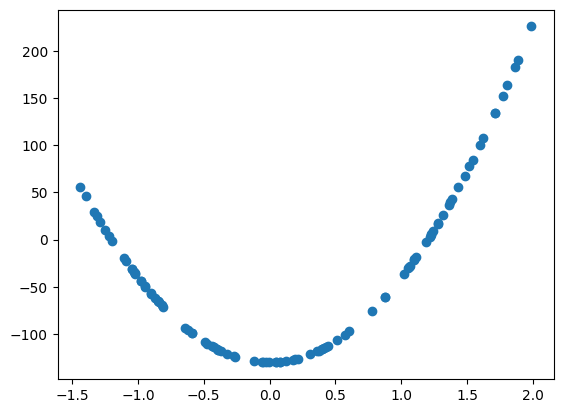

In [24]:
# scater plot of the data
plt.scatter(square_simple['x'], square_simple['y'])
square_simple

In [149]:
neural1 = NeuralNetwork([5], 1, 1)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])
neural1.train(square_simple["x"], square_simple["y"], learning_rate=0.001)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])

Epoch 0 MSE: 8679.263084954373
Epoch 500 MSE: 4428.97543548325
Epoch 1000 MSE: 3855.1894038438586
Epoch 1500 MSE: 3459.6134370439327
Epoch 2000 MSE: 3165.210056896297
Epoch 2500 MSE: 2962.014716590586
Epoch 3000 MSE: 2787.937048979415
Epoch 3500 MSE: 2641.294575795045
Epoch 4000 MSE: 2521.8159893335087
Epoch 4500 MSE: 2434.5490541000872
Epoch 5000 MSE: 2353.641328387205
Epoch 5500 MSE: 2287.583060941818
Epoch 6000 MSE: 2228.757919971742
Epoch 6500 MSE: 2177.36432446854
Epoch 7000 MSE: 2134.830136810954
Epoch 7500 MSE: 2098.1387759166323
Epoch 8000 MSE: 2066.03097940749
Epoch 8500 MSE: 2036.1470766848238
Epoch 9000 MSE: 2011.4740476934237
Epoch 9500 MSE: 1987.061178710477
Epoch 10000 MSE: 1966.3307222340995
Epoch 10500 MSE: 1948.5886479703709
Epoch 11000 MSE: 1934.3520307121084
Epoch 11500 MSE: 1918.194678210828
Epoch 12000 MSE: 1907.0193041734094
Epoch 12500 MSE: 1893.582949683053
Epoch 13000 MSE: 1882.8271082959557
Epoch 13500 MSE: 1872.5496625068063
Epoch 14000 MSE: 1861.147939681199

1793.0134591234248

Layer number 0
Weights
[[-10.55797225 -11.48267626 -11.44710805 -14.08859405 -10.0563897 ]]
biases
[[ 13.77022818  15.41418215   9.02299985 -11.95047704  10.03130811]]


Layer number 1
Weights
[[-47.98674309]
 [-51.63075023]
 [-39.59299594]
 [ 73.42935549]
 [-47.50487271]]
biases
[[83.89645855]]


None


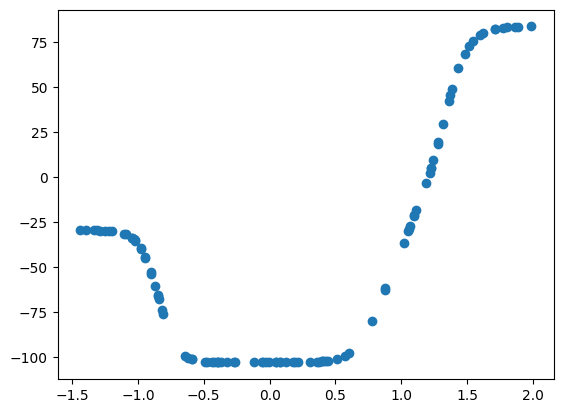

In [120]:
y = []
for i in square_simple["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple["x"], y, c="red")
plt.scatter(square_simple["x"], square_simple["y"], c="blue")
plt.legend(["Prediction", "True"])
print(neural1.visualize())

# try how its working on normalized dataset

Epoch 0 MSE: 2.5461469356565183
Epoch 2000 MSE: 0.024679336423521457
Epoch 4000 MSE: 0.014836076803101325
Epoch 6000 MSE: 0.00400608269191495
Epoch 8000 MSE: 0.0017102352673498227
Epoch 10000 MSE: 0.0017102352673498227
Epoch 12000 MSE: 0.0017102352673498227
Epoch 14000 MSE: 0.0013239302289979194
Epoch 16000 MSE: 0.001079955629448216
Epoch 18000 MSE: 0.0004578339000512188
Epoch 20000 MSE: 0.00035489203869630966
Epoch 22000 MSE: 0.00035489203869630966
Epoch 24000 MSE: 0.00035489203869630966
Epoch 26000 MSE: 0.00018342969298722303
Epoch 28000 MSE: 0.00018342969298722303
Layer 0 weights: [[ 2.68400752  0.03116214  0.09662559 -2.79343826  0.39786301]]
Layer 0 biases: [[ 3.17566024 -2.40132943  1.12266467  3.4866543   0.10745154]]
Layer 1 weights: [[-2.90630026]
 [-0.95165124]
 [ 2.36347387]
 [-4.61738868]
 [ 0.44674712]]
Layer 1 biases: [[4.27593215]]


0.008313084064175231

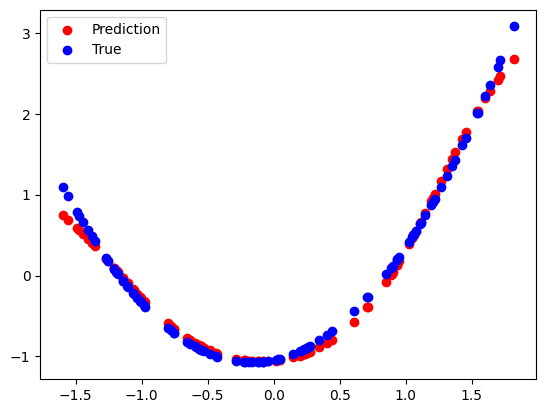

In [25]:
# normalize the data
square_simple_normalized = square_simple.copy()
square_simple_normalized["x"] = (square_simple["x"] - square_simple["x"].mean()) / square_simple["x"].std()
square_simple_normalized["y"] = (square_simple["y"] - square_simple["y"].mean()) / square_simple["y"].std()

# train the network
neural1 = NeuralNetwork([5], 1, 1)
neural1.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])
neural1.train(square_simple_normalized["x"], square_simple_normalized["y"], learning_rate=0.007, batch_size_frac=0.05)
neural1.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])

# plot the result
y = []
for i in square_simple_normalized["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple_normalized["x"], y, c='red')
plt.scatter(square_simple_normalized["x"], square_simple_normalized['y'], c='blue')
plt.legend(["Prediction", "True"])
neural1.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])

y = []
for i in steps_large_normalized["x"]:
    y.append(neural6.forward(i))
plt.scatter(steps_large_normalized["x"], y)
plt.scatter(steps_large_normalized["x"], steps_large_normalized["y"])

Epoch 0 MSE: 8901.711569055267
Epoch 1000 MSE: 1913.9521842324625
Epoch 2000 MSE: 1835.8646975388092
Epoch 3000 MSE: 1769.873292675151
Epoch 4000 MSE: 1786.4247577840451
Epoch 5000 MSE: 1900.218182089751
Epoch 6000 MSE: 1891.4805733123376
Epoch 7000 MSE: 1838.1864457575589
Epoch 8000 MSE: 1814.3560329062093
Epoch 9000 MSE: 1836.11627140791
Epoch 10000 MSE: 1927.5361818132706
Epoch 11000 MSE: 2219.040378476904
Epoch 12000 MSE: 2475.9346212512573
Epoch 13000 MSE: 1902.4119927290114
Epoch 14000 MSE: 1993.7025602250756
Epoch 15000 MSE: 2688.0143500060094
Epoch 16000 MSE: 1940.059513590181
Epoch 17000 MSE: 1870.78320567816
Epoch 18000 MSE: 2246.665959693195
Epoch 19000 MSE: 1918.634948789673
Layer number 0
Weights
[[-84.68729662 -15.12826419 -73.14393115  46.17476904 -78.16246115]]
biases
[[ 134.25284295   49.14670874   68.52969622 -101.00603466   96.38724816]]


Layer number 1
Weights
[[-95.54585017]
 [-65.07874101]
 [-71.53081769]
 [ 89.17713994]
 [-80.87147565]]
biases
[[222.65316922]]



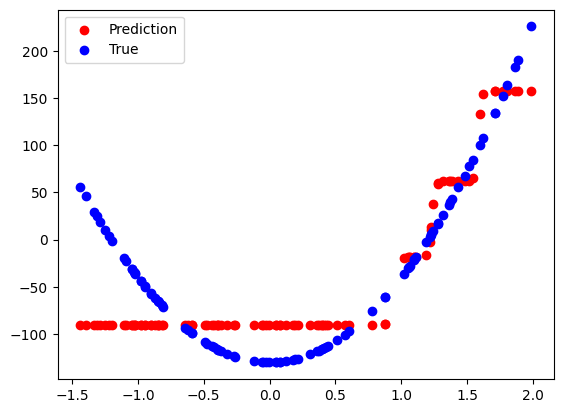

In [164]:
neural1 = NeuralNetwork([5], 1, 1)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])
neural1.train(square_simple["x"], square_simple["y"], learning_rate=0.01, batch_size_frac=0.03)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])
y = []
for i in square_simple["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple["x"], y, c="red")
plt.scatter(square_simple["x"], square_simple["y"], c="blue")
plt.legend(["Prediction", "True"])
print(neural1.visualize())

In [122]:
neural2 = NeuralNetwork([10], 1, 1)
neural2.mean_squared_error(square_simple['x'], square_simple['y'])
neural2.train(square_simple["x"], square_simple["y"])
neural2.mean_squared_error(square_simple["x"], square_simple["y"])

Epoch 0 MSE: 8518.197917834665
Epoch 100 MSE: 4120.927173130985
Epoch 200 MSE: 3281.1654997192645
Epoch 300 MSE: 2815.8021082344385
Epoch 400 MSE: 2497.7033372215637
Epoch 500 MSE: 2255.370434621555
Epoch 600 MSE: 2056.5821541740625
Epoch 700 MSE: 1884.6788506887608
Epoch 800 MSE: 1730.6070329439679
Epoch 900 MSE: 1591.2535635561674
Epoch 1000 MSE: 1465.8999108095952
Epoch 1100 MSE: 1353.746856082552
Epoch 1200 MSE: 1253.4925289353337
Epoch 1300 MSE: 1163.5934820167463
Epoch 1400 MSE: 1082.7852895288154
Epoch 1500 MSE: 1010.1034493309853
Epoch 1600 MSE: 944.6730281351047
Epoch 1700 MSE: 885.6329970638653
Epoch 1800 MSE: 832.1469390789509
Epoch 1900 MSE: 783.4554128400548


739.3609841230829

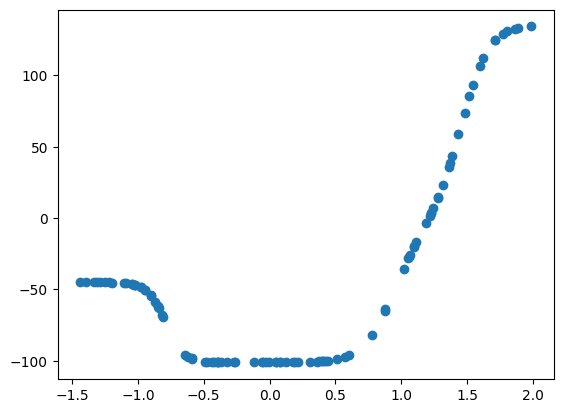

In [123]:
y = []
for i in square_simple["x"]:
    y.append(neural2.forward(i))
plt.scatter(square_simple["x"], y)

# Normalized data network 1 5 5 1

In [174]:
neural3 = NeuralNetwork([5, 5], 1, 1)
neural3.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])
neural3.train(
    square_simple_normalized["x"],
    square_simple_normalized["y"],
    learning_rate=0.01,
    batch_size_frac=0.05,
)
neural3.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])

Epoch 0 MSE: 2.5850311359456244
Epoch 2000 MSE: 0.4476244212874901
Epoch 4000 MSE: 0.26078294481037334
Epoch 6000 MSE: 0.16336484992210729
Epoch 8000 MSE: 0.08070776813056206
Epoch 10000 MSE: 0.04326823513342685
Epoch 12000 MSE: 0.024929242888626996
Epoch 14000 MSE: 0.015344827790097961
Epoch 16000 MSE: 0.010527176291817113
Epoch 18000 MSE: 0.007388150096574468
Epoch 20000 MSE: 0.005634373571735698
Epoch 22000 MSE: 0.004481574289749826
Epoch 24000 MSE: 0.0038671574378594496
Epoch 26000 MSE: 0.0033271282110657295
Epoch 28000 MSE: 0.003020213282573455


0.0027083281506006217

Layer number 0
Weights
[[-0.53426207 -1.73169548  0.87141266 -1.94921312  2.34105108]]
biases
[[-0.08015726  2.04002731 -0.94996361  2.77226838  2.39703812]]


Layer number 1
Weights
[[ 1.4595624   0.13340168 -1.11720839 -1.0818167   0.25130736]
 [-0.45084987  2.45010917 -2.09223856 -0.3027684  -1.20151954]
 [ 0.03715598 -0.53164938  0.52675696 -0.28253922  1.38630372]
 [-0.84999324  2.17472096 -2.10944048  0.62383404 -0.32177382]
 [-1.14279679 -0.1347833   3.18326349 -1.25648362  4.23266813]]
biases
[[ 0.57377837 -1.22515079 -0.87723002 -2.18840868 -0.07317526]]


Layer number 2
Weights
[[ 2.82630709]
 [-1.7604532 ]
 [ 4.16988216]
 [-0.35727796]
 [-3.08990455]]
biases
[[2.39017651]]


None


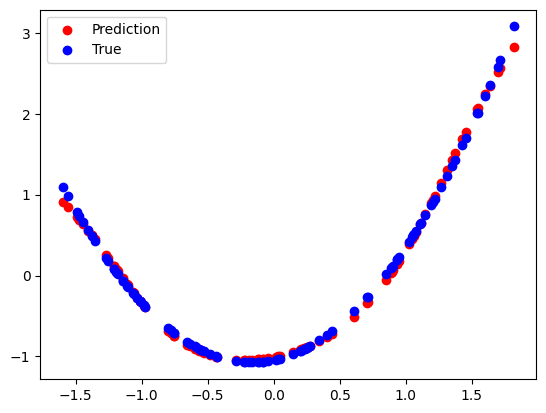

In [175]:
y = []
for i in square_simple_normalized["x"]:
    y.append(neural3.forward(i))
plt.scatter(square_simple_normalized["x"], y, c="red")
plt.scatter(square_simple_normalized["x"], square_simple_normalized["y"], c="blue")
plt.legend(["Prediction", "True"])
print(neural3.visualize())


# Second set

,x,y
1,1.706990,160
2,-0.604580,-80
3,-0.674405,-80
4,1.341562,80
5,-1.427434,-80
...,...,...
996,-1.374447,-80
997,-0.764941,-80
998,-0.304863,0
999,1.681272,160


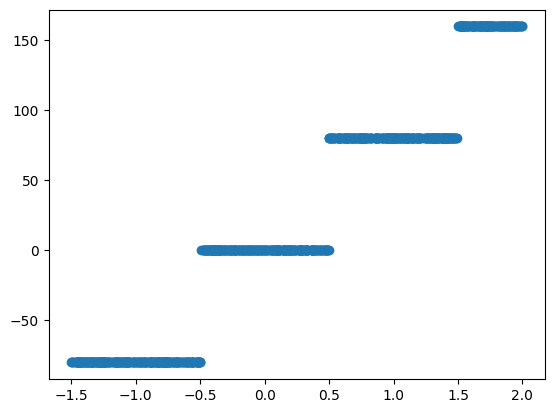

In [7]:
steps_large = pd.read_csv("../data/regression/steps-large-test.csv", index_col=0)
plt.scatter(steps_large["x"], steps_large["y"])
steps_large

In [126]:
neural4 = NeuralNetwork([5], 1, 1)
neural4.mean_squared_error(steps_large["x"], steps_large["y"])
neural4.train(steps_large["x"], steps_large["y"])
neural4.mean_squared_error(steps_large["x"], steps_large["y"])

Epoch 0 MSE: 7331.0497641310485
Epoch 100 MSE: 2993.7307737129927
Epoch 200 MSE: 1672.454099640688
Epoch 300 MSE: 1191.7054310157607
Epoch 400 MSE: 893.5021904920021
Epoch 500 MSE: 691.9812168242296
Epoch 600 MSE: 544.3503907951681
Epoch 700 MSE: 442.70303349866646
Epoch 800 MSE: 376.5310429442026
Epoch 900 MSE: 332.834129225353
Epoch 1000 MSE: 302.3667858002931
Epoch 1100 MSE: 279.53205061720286
Epoch 1200 MSE: 260.87308087816285
Epoch 1300 MSE: 243.67952023388892
Epoch 1400 MSE: 226.73172295880758
Epoch 1500 MSE: 212.7097792262382
Epoch 1600 MSE: 201.66064997942624
Epoch 1700 MSE: 192.4936398068851
Epoch 1800 MSE: 184.69549106872972
Epoch 1900 MSE: 177.95235987213871


172.09377230063652

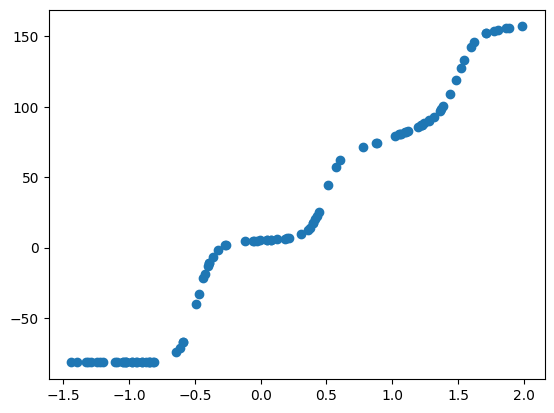

In [127]:
y = []
for i in square_simple["x"]:
    y.append(neural4.forward(i))
plt.scatter(square_simple["x"], y)

In [133]:
neural5 = NeuralNetwork([10], 1, 1)
neural5.mean_squared_error(steps_large["x"], steps_large["y"])
# neural5.train(steps_large["x"], steps_large["y"])
# neural5.mean_squared_error(steps_large["x"], steps_large["y"])

7560.0669420173335

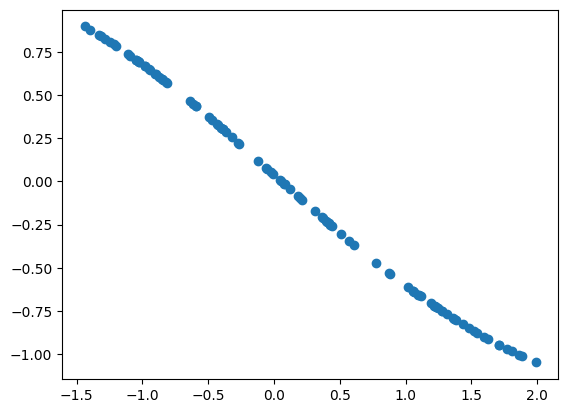

In [134]:
y = []
for i in square_simple["x"]:
    y.append(neural5.forward(i))
plt.scatter(square_simple["x"], y)

In [193]:
neural6 = NeuralNetwork([5,5], 1, 1)
neural6.mean_squared_error(steps_large["x"], steps_large["y"])
neural6.train(
    steps_large["x"],
    steps_large["y"],
    learning_rate=0.000001,
    batch_size_frac=0.005,
    epochs=10000,
)
neural6.mean_squared_error(steps_large["x"], steps_large["y"])

Epoch 0 MSE: 7722.443526115136
Epoch 2000 MSE: 0.3400107221662293
Epoch 4000 MSE: 0.15213123188025893
Epoch 6000 MSE: 0.04739203455918475
Epoch 8000 MSE: 0.0017196750428429893
Layer 0 weights: [[ 0.60200702 -0.52865276  0.46774741 -2.41194847 -0.09251436]]
Layer 0 biases: [[ 1.58036245  1.78263002  0.69721229  0.71150891 -1.40960299]]
Layer 1 weights: [[ 0.48669931 -0.73874183  0.66766702  1.46044186  0.92104873]
 [ 0.53310113 -1.42549089  0.76247458 -1.36930952 -0.44980329]
 [-0.21862883  0.56792213  0.4805391  -0.52826695 -0.12246732]
 [ 0.65547568  0.57739488  0.43352905  0.20822411 -1.65008728]
 [-0.54749659 -0.36287548 -1.16350094 -1.0148401   0.16554833]]
Layer 1 biases: [[-0.24822129 -0.87836001 -1.4967246  -1.11917524 -0.17877575]]
Layer 2 weights: [[-0.13363029]
 [-0.26805624]
 [ 1.23821238]
 [-0.65023909]
 [ 1.05503364]]
Layer 2 biases: [[-0.44735457]]


7420.853104498121

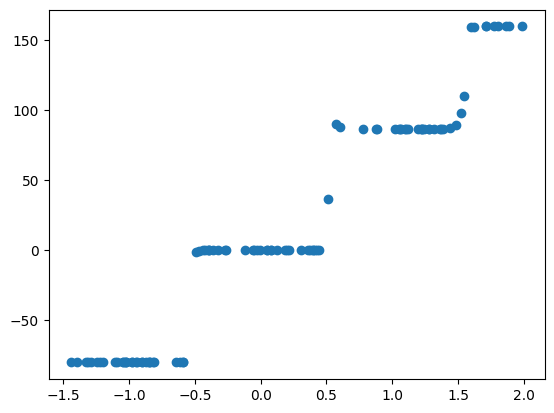

In [190]:
y = []
for i in square_simple["x"]:
    y.append(neural6.forward(i))
plt.scatter(square_simple["x"], y)

In [198]:
neural3 = NeuralNetwork([5, 5], 1, 1)
neural3.mean_squared_error(square_simple["x"], square_simple["y"])
neural3.train(
    square_simple["x"],
    square_simple["y"],
    learning_rate=0.01,
    batch_size_frac=0.01,
    epochs=10000,
)
neural3.mean_squared_error(square_simple["x"], square_simple["y"])

Epoch 0 MSE: 15794.628709302955
Epoch 2000 MSE: 0.0005275043892399619
Epoch 4000 MSE: 1.4918453634594652e-05
Epoch 6000 MSE: 1.4918453634594652e-05
Epoch 8000 MSE: 1.4918453634594652e-05
Layer 0 weights: [[ -0.07330932  -0.20588972 -11.60633241  -4.78312621  -0.28208229]]
Layer 0 biases: [[ 6.83075339  8.97080656 -6.42892976 15.48246245 15.99670371]]
Layer 1 weights: [[-3.55613486 -0.27939054 -0.18610176 -5.05617444 -6.397215  ]
 [-3.53907387  3.61741395  2.51961973 -5.14197434 -7.36431601]
 [-5.65367863 -0.28794956 -2.63611298 -2.70400114  0.62517523]
 [-1.17277112 10.68284339 -0.47140753 -4.66441072 -4.35039596]
 [-9.20322336 20.24024808  0.61759863  7.60692885 -4.24373242]]
Layer 1 biases: [[ -4.12584809  -3.05222672 -19.97303182  -9.24539434  -2.36240231]]
Layer 2 weights: [[  8.47579245]
 [-25.47068593]
 [-13.52334902]
 [ -8.69321542]
 [ 12.74351726]]
Layer 2 biases: [[-13.93883606]]


7256.686204636511

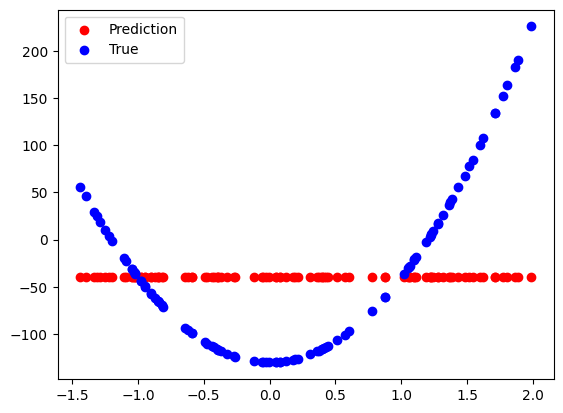

In [201]:
y = []
for i in square_simple["x"]:
    y.append(neural3.forward(i))
plt.scatter(square_simple["x"], y, c="red")
plt.scatter(square_simple["x"], square_simple["y"], c="blue")
plt.legend(["Prediction", "True"])

# Normalized try on steps


In [9]:
steps_large_normalized = steps_large.copy()
steps_large_normalized["x"] = (steps_large["x"] - steps_large["x"].mean()) / steps_large["x"].std()
steps_large_normalized["y"] = (steps_large["y"] - steps_large["y"].mean()) / steps_large["y"].std()


In [10]:
steps_large_normalized

,x,y
1,1.420624,1.639313
2,-0.839207,-1.251892
3,-0.907469,-1.251892
4,1.063375,0.675578
5,-1.643643,-1.251892
...,...,...
996,-1.591841,-1.251892
997,-0.995978,-1.251892
998,-0.546198,-0.288157
999,1.395481,1.639313


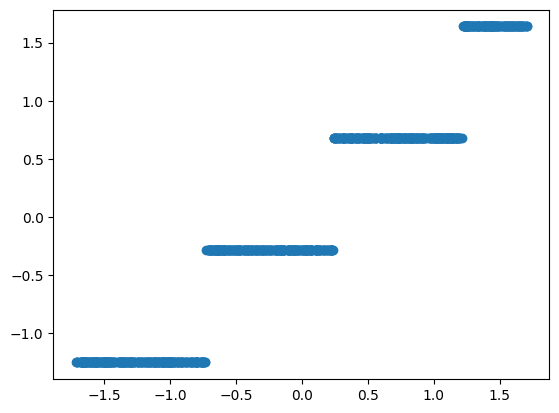

In [11]:
plt.scatter(steps_large_normalized["x"], steps_large_normalized["y"])

In [19]:
neural6 = NeuralNetwork([5, 5], 1, 1)
neural6.mean_squared_error(steps_large_normalized["x"], steps_large_normalized["y"])
neural6.train(
    steps_large_normalized["x"],
    steps_large_normalized["y"],
    learning_rate=0.01,
    batch_size_frac=0.005,
    epochs=6000,
)
neural6.mean_squared_error(steps_large_normalized["x"], steps_large_normalized["y"])

Epoch 0 MSE: 4.839810092773576
Epoch 2000 MSE: 0.002363308240240319
Epoch 4000 MSE: 0.00021142728619193602
Layer 0 weights: [[-1.55243879 -0.20833594 -0.47936067 -0.27537113 -1.57016126]]
Layer 0 biases: [[ 0.9073333   0.9525116   2.59327454  0.08639669 -0.8155977 ]]
Layer 1 weights: [[ 0.09735381  1.9511256  -2.09142303  1.42136292 -1.00305924]
 [ 0.73836943 -0.60483819  1.80818974  0.27414355  0.46381895]
 [-0.38418161 -1.52271959  1.26726305  0.11752469 -0.15699983]
 [ 2.24091769  0.55474257 -0.15620876  0.36902011  0.56467272]
 [ 0.03619556  0.17302637  0.05745175  0.72013416 -2.33256654]]
Layer 1 biases: [[0.66230328 0.54280295 1.06702998 0.37121933 0.94379401]]
Layer 2 weights: [[ 0.65063605]
 [-2.19587552]
 [ 1.34370875]
 [-1.52237304]
 [ 2.65589216]]
Layer 2 biases: [[-0.4409279]]


0.07860526310912994

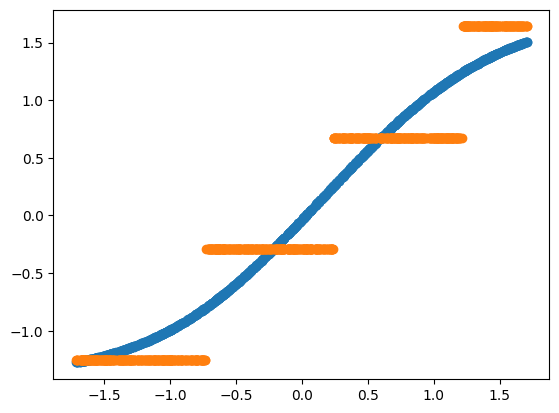

In [20]:
y = []
for i in steps_large_normalized["x"]:
    y.append(neural6.forward(i))
plt.scatter(steps_large_normalized["x"], y)
plt.scatter(steps_large_normalized["x"], steps_large_normalized["y"])

In [31]:
neural6 = NeuralNetwork([5, 5], 1, 1)
neural6.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])
neural6.train(
    square_simple_normalized["x"],
    square_simple_normalized["y"],
    learning_rate=0.00001,
    batch_size_frac=0.1,
    epochs=20000,
)
neural6.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])

Epoch 0 MSE: 0.9194987671045324
Epoch 2000 MSE: 0.21022339233299778
Epoch 4000 MSE: 0.17031832796358687
Epoch 6000 MSE: 0.11605273365831112
Epoch 8000 MSE: 0.09829166467497677
Epoch 10000 MSE: 0.09829166467497677
Epoch 12000 MSE: 0.09829166467497677
Epoch 14000 MSE: 0.09829166467497677
Epoch 16000 MSE: 0.09309206711399261
Epoch 18000 MSE: 0.09309206711399261
Layer 0 weights: [[-0.15347944  1.75520991 -1.33228106 -0.07026163 -0.97418246]]
Layer 0 biases: [[-0.93274138 -0.1964405   1.72056314 -1.56375071  1.09110824]]
Layer 1 weights: [[-0.86118123  0.69661909  0.28710221 -1.53653914 -0.53310008]
 [-0.58750203  0.46875297  0.66363387  0.87907011  0.79874984]
 [ 0.09891831  0.01959953  1.5077989   1.44927083 -0.30201097]
 [-0.00302467 -0.63777246 -0.72164487  0.11845678  0.50301672]
 [-0.40455482 -0.06461475 -0.08056967  0.58509584  1.36173234]]
Layer 1 biases: [[-0.71514089  0.98761238  0.56169665 -0.71591118 -0.36387313]]
Layer 2 weights: [[-0.73404   ]
 [ 0.98678661]
 [ 0.32887776]
 [-

0.9520701344962681

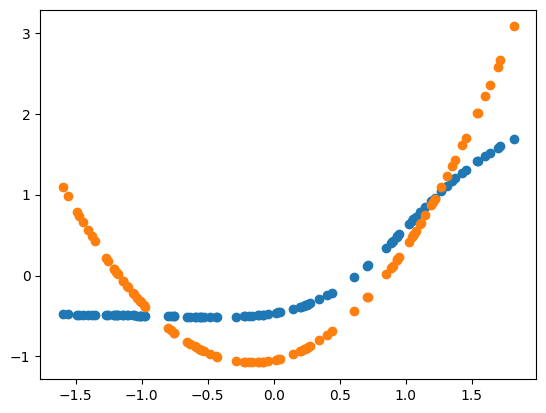

In [30]:
y = []
for i in square_simple_normalized["x"]:
    y.append(neural6.forward(i))
plt.scatter(square_simple_normalized["x"], y)
plt.scatter(square_simple_normalized["x"], square_simple_normalized["y"])